## 딥러닝 영상처리
# Cifar-10 분류
- 10가지 클래스
- 컬러이미지

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
y_train.ravel()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [4]:
X_train.dtype, X_train.max(), X_train.min()

(dtype('uint8'), 255, 0)

### 데이터 전처리

In [5]:
### 0~255 값을 0.0~1.0 으로 바꾼다
X_train = X_train/255
X_test = X_test/255

### 원핫인코딩
y_train = np.eye(10)[y_train.ravel()] # ravel() : 1차원형태로 바꾼다
y_test = np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [6]:
labels = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

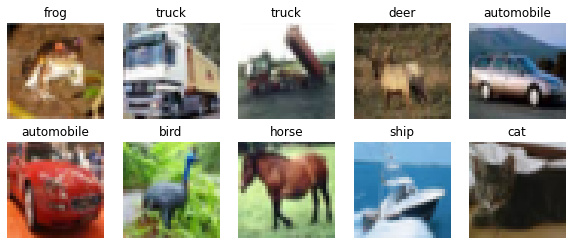

In [7]:
plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(labels[y_train[i].argmax()])

### CNN 적용

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
            activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [21]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20,
                   validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 6s 9ms/step - loss: 1.5636 - acc: 0.4523 - val_loss: 1.3791 - val_acc: 0.5259
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.2753 - acc: 0.5563 - val_loss: 1.2667 - val_acc: 0.5602
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 1.1731 - acc: 0.5925 - val_loss: 1.2028 - val_acc: 0.5869
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 1.1049 - acc: 0.6214 - val_loss: 1.1775 - val_acc: 0.5934
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0528 - acc: 0.6377 - val_loss: 1.1332 - val_acc: 0.6118
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 1.0057 - acc: 0.6551 - val_loss: 1.1373 - val_acc: 0.6088
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9669 - acc: 0.6657 - val_loss: 1.1161 - val_acc: 0.6160
Epoch 8/20
625/625 [==============================] - 5s 9ms/step - loss: 0.

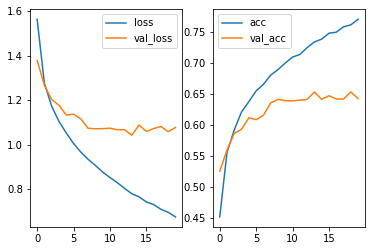

In [22]:
h = model.history.history

plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

### 중간층 추가

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
                              input_shape=(32,32,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [25]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20,
                   validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 13s 20ms/step - loss: 1.8108 - acc: 0.3325 - val_loss: 1.4457 - val_acc: 0.4807
Epoch 2/20
625/625 [==============================] - 12s 20ms/step - loss: 1.4564 - acc: 0.4748 - val_loss: 1.2566 - val_acc: 0.5530
Epoch 3/20
625/625 [==============================] - 13s 20ms/step - loss: 1.3154 - acc: 0.5303 - val_loss: 1.1374 - val_acc: 0.5986
Epoch 4/20
625/625 [==============================] - 13s 20ms/step - loss: 1.2201 - acc: 0.5643 - val_loss: 1.0302 - val_acc: 0.6317
Epoch 5/20
625/625 [==============================] - 13s 20ms/step - loss: 1.1410 - acc: 0.5974 - val_loss: 0.9696 - val_acc: 0.6577
Epoch 6/20
625/625 [==============================] - 13s 20ms/step - loss: 1.0760 - acc: 0.6215 - val_loss: 0.9121 - val_acc: 0.6801
Epoch 7/20
625/625 [==============================] - 13s 20ms/step - loss: 1.0389 - acc: 0.6341 - val_loss: 0.8971 - val_acc: 0.6840
Epoch 8/20
625/625 [==============================] - 13s 20ms

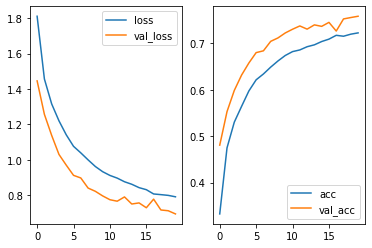

In [26]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### 모델 저장

In [27]:
model.save('cifar10_model_1.h5')  # creates a HDF5 file

In [28]:
from keras.models import load_model

model2 = load_model('cifar10_model_1.h5')

In [ ]:
model.save_weights("cifar10_weights_01.h5")
model2.load_weights("cifar10_weights_01.h5")

### 결과 분석

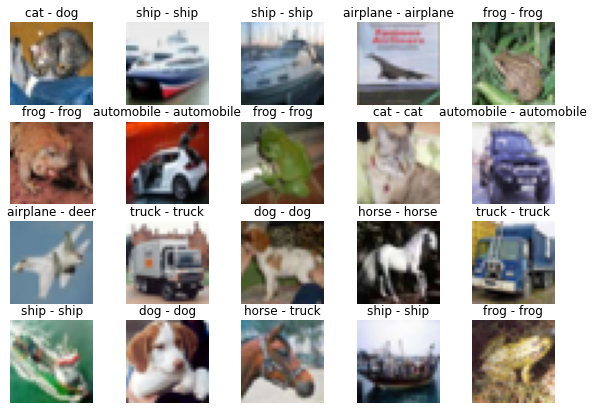

In [29]:
y_pred = model.predict(X_test[:20])
plt.figure(figsize=[10,7])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(labels[np.argmax(y_test[i])] + ' - ' + labels[np.argmax(y_pred[i])])

In [34]:
y_pred = model.predict(X_test)
(y_test.argmax(axis=1) == y_pred.argmax(axis=1)).mean()

0.7574

In [41]:
idx = np.where(y_test.argmax(axis=1) != y_pred.argmax(axis=1))[0]

In [42]:
np.bincount(y_test[idx].argmax(axis=1))

array([196, 132, 321, 451, 324, 341, 163, 217, 127, 154], dtype=int64)

In [43]:
np.bincount(y_pred[idx].argmax(axis=1))

array([225,  97, 448, 400, 239, 310, 237, 162, 144, 164], dtype=int64)

In [50]:
mat = np.zeros([10,10])

for i in idx:
    mat[y_test[i].argmax(), y_pred[i].argmax()] += 1

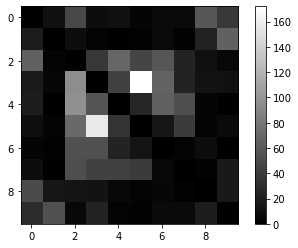

In [52]:
plt.imshow(mat, cmap='gray')
plt.colorbar()